In [4]:
#Handling Missing Values 
import pandas as pd
import numpy as np 
from sklearn.impute import SimpleImputer, KNNImputer



In [5]:
df = pd.read_csv(r"C:\Users\ishaa\OneDrive\Desktop\InternshipGenAI\kaggleDATA\sample_missing_data_Version2.csv")
print(df.head())

   ID   Age   Salary Department  Gender  Experience
0   1  25.0  50000.0      Sales    Male         2.0
1   2   NaN  60000.0  Marketing  Female         3.0
2   3  28.0      NaN         HR     NaN         4.0
3   4  35.0  72000.0      Sales    Male         NaN
4   5  42.0  80000.0        NaN  Female         8.0


In [6]:
#lets find out the missing Values 
find_null = df.isnull().sum
print(find_null)

<bound method DataFrame.sum of       ID    Age  Salary  Department  Gender  Experience
0  False  False   False       False   False       False
1  False   True   False       False   False       False
2  False  False    True       False    True       False
3  False  False   False       False   False        True
4  False  False   False        True   False       False
5  False  False   False       False    True       False
6  False   True   False       False   False       False
7  False  False    True       False   False       False
8  False  False   False       False   False        True
9  False  False   False       False    True       False>


In [7]:
null_mean = df.isnull().mean()*100
print(null_mean)

ID             0.0
Age           20.0
Salary        20.0
Department    10.0
Gender        30.0
Experience    20.0
dtype: float64


In [8]:
#viz of missing values 
import sys
print(sys.executable)
!{sys.executable} -m pip install missingno

c:\Users\ishaa\anaconda3\python.exe


<Axes: >

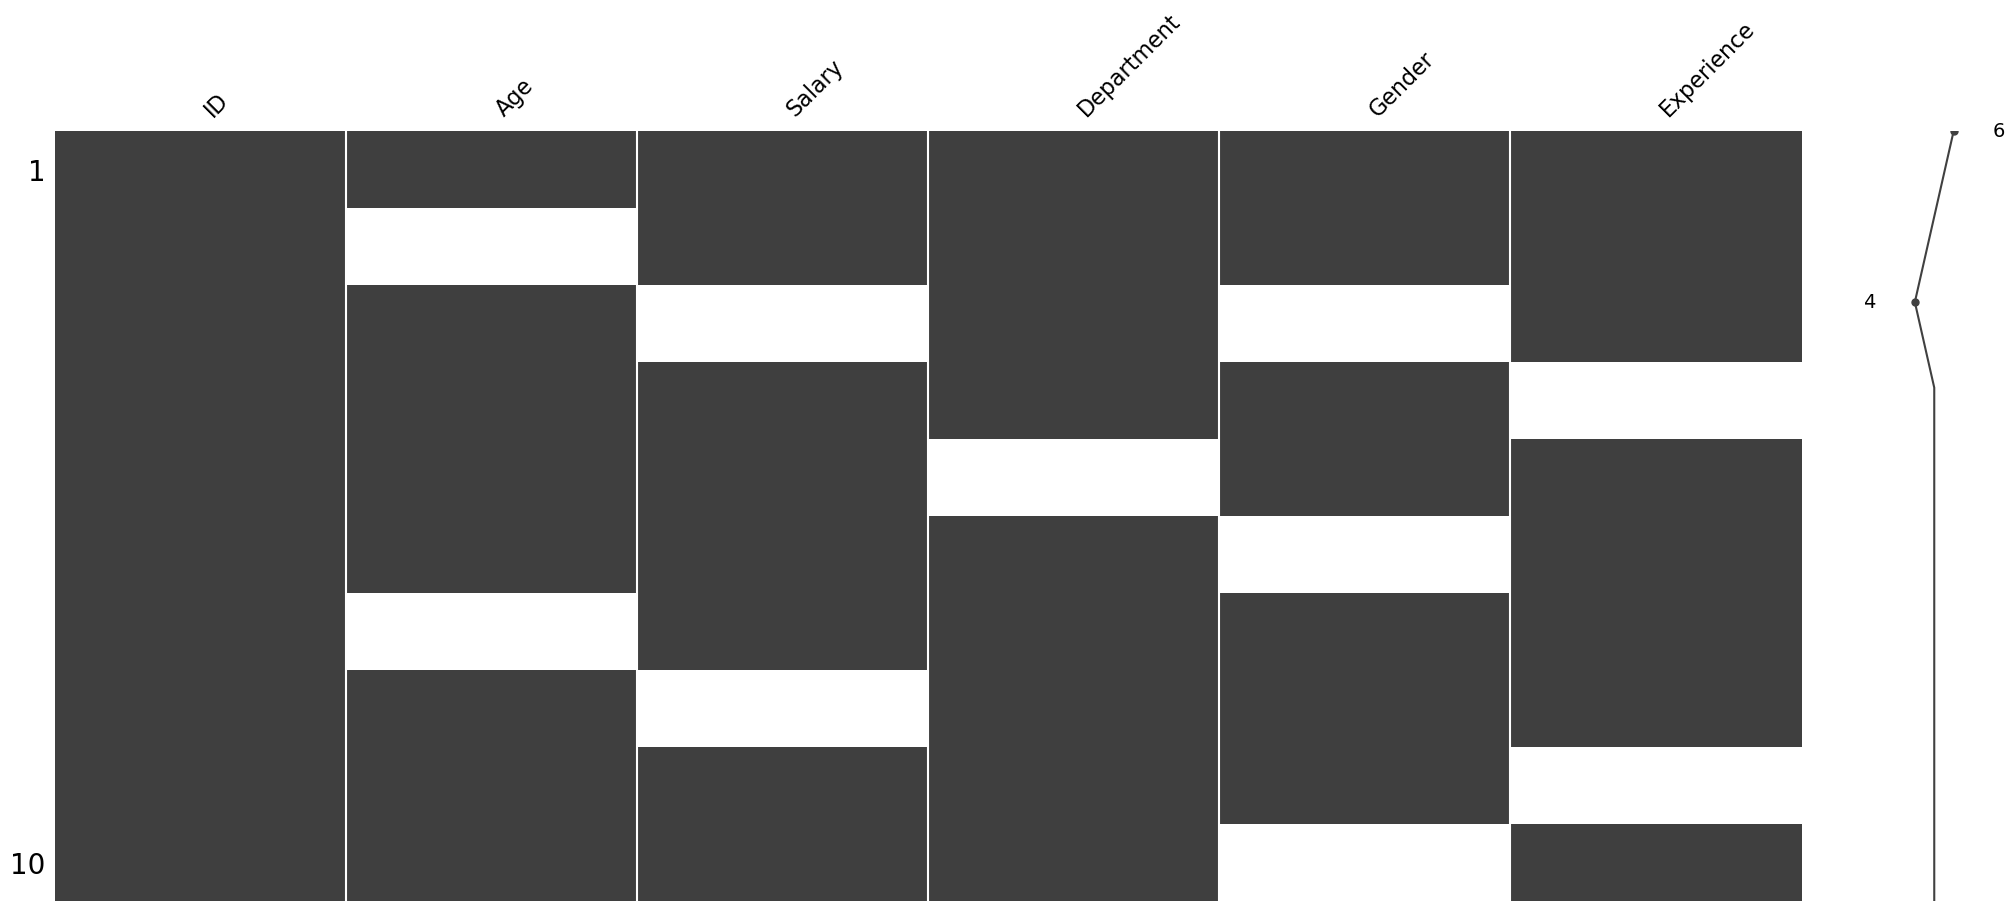

In [9]:
import missingno as ms
ms.matrix(df)

In [13]:
#for whole Dataset 
print("the total missing items in Whole Dataset:",df.isnull().sum().sum())

the total missing items in Whole Dataset: 10


In [14]:
#checking row wise 
print(df[df.isnull().any(axis=1)])

   ID   Age   Salary Department  Gender  Experience
1   2   NaN  60000.0  Marketing  Female         3.0
2   3  28.0      NaN         HR     NaN         4.0
3   4  35.0  72000.0      Sales    Male         NaN
4   5  42.0  80000.0        NaN  Female         8.0
5   6  29.0  58000.0  Marketing     NaN         5.0
6   7   NaN  54000.0         HR  Female         2.0
7   8  31.0      NaN      Sales    Male         6.0
8   9  38.0  91000.0  Marketing  Female         NaN
9  10  27.0  52000.0         HR     NaN         3.0


In [ ]:
#lets handle the data now !!
df_clean_rows = df.dropna()
print(df_clean_rows)
#it did remove all the Other rows hence data can be lost

   ID   Age   Salary Department Gender  Experience
0   1  25.0  50000.0      Sales   Male         2.0


In [ ]:
df_clean_col = df.dropna(axis=1)
print(df_clean_col)
#all other coloumns removed hence Not Feasible 

   ID
0   1
1   2
2   3
3   4
4   5
5   6
6   7
7   8
8   9
9  10


In [ ]:
#filling/imputing the values 
filling_cols = df['Age'].fillna(df['Age'].mean())
print(filling_cols)
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df)

0    25.000
1    31.875
2    28.000
3    35.000
4    42.000
5    29.000
6    31.875
7    31.000
8    38.000
9    27.000
Name: Age, dtype: float64
   ID     Age   Salary Department  Gender  Experience
0   1  25.000  50000.0      Sales    Male         2.0
1   2  31.875  60000.0  Marketing  Female         3.0
2   3  28.000      NaN         HR     NaN         4.0
3   4  35.000  72000.0      Sales    Male         NaN
4   5  42.000  80000.0        NaN  Female         8.0
5   6  29.000  58000.0  Marketing     NaN         5.0
6   7  31.875  54000.0         HR  Female         2.0
7   8  31.000      NaN      Sales    Male         6.0
8   9  38.000  91000.0  Marketing  Female         NaN
9  10  27.000  52000.0         HR     NaN         3.0


In [ ]:
filling_cols_median = df['Age'].fillna(df['Age'].median())
df['Age'] = filling_cols_median
print(filling_cols_median)
print(df)
#no changes as there are no NaN VALUES NOW , for effects to take place we need to rvett the changes that were made by the Old columns

0    25.000
1    31.875
2    28.000
3    35.000
4    42.000
5    29.000
6    31.875
7    31.000
8    38.000
9    27.000
Name: Age, dtype: float64
   ID     Age   Salary Department  Gender  Experience
0   1  25.000  50000.0      Sales    Male         2.0
1   2  31.875  60000.0  Marketing  Female         3.0
2   3  28.000      NaN         HR     NaN         4.0
3   4  35.000  72000.0      Sales    Male         NaN
4   5  42.000  80000.0        NaN  Female         8.0
5   6  29.000  58000.0  Marketing     NaN         5.0
6   7  31.875  54000.0         HR  Female         2.0
7   8  31.000      NaN      Sales    Male         6.0
8   9  38.000  91000.0  Marketing  Female         NaN
9  10  27.000  52000.0         HR     NaN         3.0


In [ ]:
imputer = SimpleImputer( strategy='mean')
# df_imputed = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
# print(df_imputed)
# #works onlt for numerical data Only